#  Intermediate Scattering Factor and One time Correlation

In [1]:
import skxray.roi as roi
import skxray.correlation as corr
import skxray.core as core

from lmfit import minimize, Parameters

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


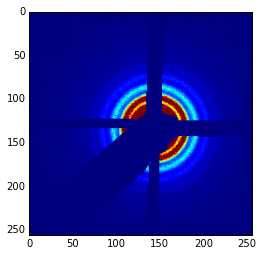

In [2]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

avg_img = np.average(duke_data, axis=0)

mask4 = np.load("/Users/sameera/Desktop/XSVS/new_mask4.npy")
mask = np.load("/Users/sameera/Desktop/XSVS/Luxi_data/Luxi_duke_mask.npy")

N_mask = ~(mask + mask4)

plt.imshow(N_mask*avg_img, vmax=1e0)
plt.show()

In [3]:
inner_radius = 24
width = 1
spacing = 1
num_rings = 10
center = (133, 143)

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, center, avg_img.shape)

mask_data2 = N_mask*duke_data[0:4999]

ring_mask = rings*N_mask

In [4]:
num_levels = 7
num_bufs = 8

g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, ring_mask,
                                             mask_data2)

exposuretime=0.001;
deadtime=60e-6;
timeperframe = exposuretime+deadtime
lags = lag_steps*timeperframe

roi_names = ['gray', 'orange', 'brown', 'red', 'green', 'blue', 'black', 'purple', 'pink', 'yellow']

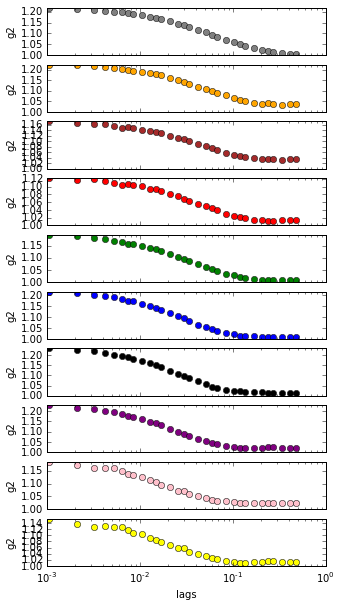

In [5]:
fig, axes = plt.subplots(num_rings, sharex=True, figsize=(5,10))
axes[num_rings-1].set_xlabel("lags")
for i, roi_color in zip(range(num_rings), roi_names):
    axes[i].set_ylabel("g2") 
    axes[i].semilogx(lags, g2[:, i], 'o', markerfacecolor=roi_color, markersize=6)
    axes[i].set_ylim(bottom=1, top=np.max(g2[1:, i]))
plt.show()

# Use the ISF to fit the one time correlation values for each ring

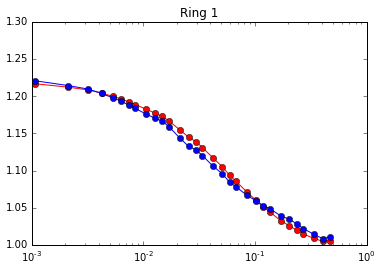

In [6]:
# create a set of Parameters for first ring
params1 = Parameters()
params1.add('beta',  value=0.1699, min=0.167, max=0.21556)
params1.add('relaxation_rate', value=6.159, min=6.158, max=6.197)
params1.add('baseline', value=1, min=0.8, max=1.0)

final_result1 = corr.fit_auto_corr(params1, lags, g2[:, 0], eps_data=1)

plt.semilogx(lags, g2[:,0], '-ro')
plt.semilogx(lags, final_result1, '-bo')
plt.ylim(1.0, 1.3)
plt.title("Ring 1")
plt.show()

In [7]:
final_result1, g2[:,0]

(array([ 1.52435814,  1.22077244,  1.21425194,  1.20959893,  1.20379931,
         1.19761871,  1.19343224,  1.18756681,  1.18345207,  1.17589573,
         1.1703911 ,  1.16621316,  1.15897982,  1.14388557,  1.13250928,
         1.12790766,  1.11999134,  1.105638  ,  1.09588097,  1.08428899,
         1.0781127 ,  1.06672888,  1.05957892,  1.05270795,  1.04898179,
         1.03924407,  1.03436871,  1.02842429,  1.02207836,  1.01415709,
         1.00829536,  1.01104252]),
 array([ 1.36995905,  1.21675949,  1.21211088,  1.20841415,  1.20416199,
         1.19973699,  1.19632647,  1.19209367,  1.18875318,  1.1824588 ,
         1.17725553,  1.17277916,  1.166837  ,  1.15481826,  1.14488742,
         1.1385611 ,  1.13078353,  1.1165446 ,  1.10530841,  1.09378902,
         1.08554848,  1.0710426 ,  1.06032461,  1.05110028,  1.0445458 ,
         1.03279372,  1.02583527,  1.0198939 ,  1.01477085,  1.00868824,
         1.00484204,  1.00582078]))

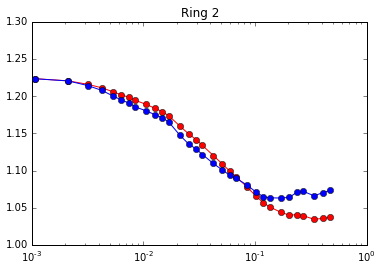

In [252]:
# create a set of Parameters for second ring
params2 = Parameters()
params2.add('beta',  value=0.15, min=0.148, max=0.2268)
params2.add('relaxation_rate', value=6.478, min=6.38, max=6.489)
params2.add('baseline', value=1, min=0.823, max=1)  

final_result2 = corr.fit_auto_corr(params2, lags, g2[:, 1], eps_data=1)

plt.semilogx(lags, g2[:,1], '-ro')
plt.semilogx(lags, final_result2, '-bo')
plt.title("Ring 2")
plt.ylim(1.0, 1.3)
plt.show()

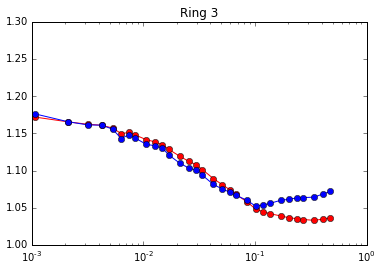

In [269]:
# create a set of Parameters for third ring
params3 = Parameters()
params3.add('beta',  value=0.13497, min=0.109, max=0.17)
params3.add('relaxation_rate', value=6.67, min=6.596, max=6.69)
params3.add('baseline', value=1, min=0.88, max=1.0)
 
final_result3 = corr.fit_auto_corr(params3, lags, g2[:, 2], eps_data=1)  

plt.semilogx(lags, g2[:, 2], '-ro')
plt.semilogx(lags, final_result3, '-bo')
plt.title("Ring 3")
plt.ylim(1.0, 1.3)
plt.show()

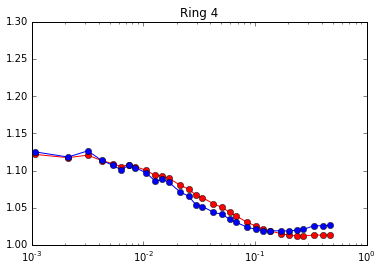

In [285]:

# create a set of Parameters for 4th ring
params4 = Parameters()
params4.add('beta',  value=0.12, min=0.12, max=0.139)
params4.add('relaxation_rate', value=6.85, min=6.82, max=6.858)
params4.add('baseline', value=1.0, min=0.88, max=1.0)

final_result4 = corr.fit_auto_corr(params4, lags, g2[:, 3], eps_data=1)  

plt.semilogx(lags, g2[:, 3], '-ro')
plt.semilogx(lags, final_result4, '-bo')
plt.title("Ring 4")
plt.ylim(1.0, 1.3)
plt.show()
            

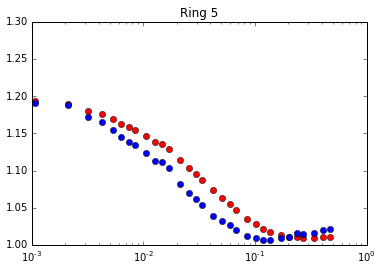

In [296]:
# create a set of Parameters for 4th ring
params5 = Parameters()
params5.add('beta',  value=0.12, min=0.11,  max=0.198)
params5.add('relaxation_rate', value=6.987, min=6.87, max=7.23)
params5.add('baseline', value=1.0, min=0.86, max=1.12)

final_result5 = corr.fit_auto_corr(params5, lags, g2[:, 4], eps_data=1)  

plt.semilogx(lags, g2[:, 4], 'ro')
plt.semilogx(lags, final_result5, 'bo')
plt.title("Ring 5")
plt.ylim(1.0, 1.3)
plt.show()

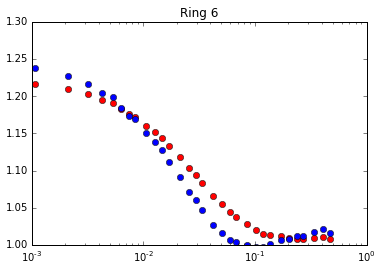

In [302]:
# create a set of Parameters for 4th ring
params6 = Parameters()
params6.add('beta',  value=0.075, min=0.0588, max=0.199)
params6.add('relaxation_rate', value=7.3, min=7.23, max=7.5)
params6.add('baseline', value=1.0, min=0.86, max=1.12)
final_result6 = corr.fit_auto_corr(params6, lags, g2[:, 5], eps_data=1)  

plt.semilogx(lags, g2[:, 5], 'ro')
plt.semilogx(lags, final_result6, 'bo')
plt.title("Ring 6")
plt.ylim(1.0, 1.3)
plt.show()

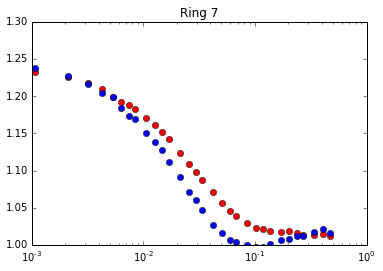

In [346]:
# create a set of Parameters for 7th ring
params7 = Parameters()
params7.add('beta',  value=0.251, min=0.25, max=0.261)
params7.add('relaxation_rate', value=6.78, min=6.697, max=6.78)
params7.add('baseline', value=1) 

final_result7 = corr.fit_auto_corr(params7, lags, g2[:, 6], eps_data=1)  

plt.semilogx(lags, g2[:, 6], 'ro')
plt.semilogx(lags, final_result6, 'bo')
plt.title("Ring 7")
plt.ylim(1.0, 1.3)
plt.show()

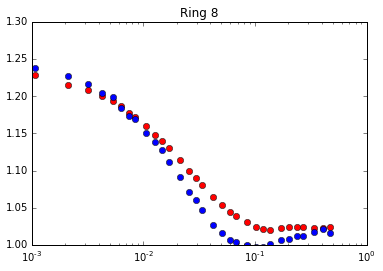

In [350]:
# create a set of Parameters for 7th ring
params8 = Parameters()
params8.add('beta',  value=0.087, min=0.07, max=0.09)
params8.add('relaxation_rate', value=6.23, min=6.223, max=6.234)
params8.add('baseline', value=1) 

final_result8 = corr.fit_auto_corr(params8, lags, g2[:, 7], eps_data=1)  

plt.semilogx(lags, g2[:, 7], 'ro')
plt.semilogx(lags, final_result6, 'bo')
plt.title("Ring 8")
plt.ylim(1.0, 1.3)
plt.show()

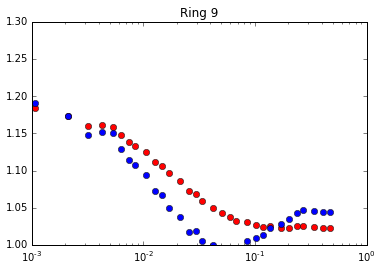

In [326]:
# create a set of Parameters for 7th ring
params9 = Parameters()
params9.add('beta',  value=0.167, min=0.1204, max=0.18)
params9.add('relaxation_rate', value=6.845, min=6.8, max=6.89)
params9.add('baseline', value=1) 

final_result9 = corr.fit_auto_corr(params9, lags, g2[:, 8], eps_data=1)  

plt.semilogx(lags, g2[:, 8], 'ro')
plt.semilogx(lags, final_result9, 'bo')
plt.title("Ring 9")
plt.ylim(1.0, 1.3)
plt.show()

#  convert edge values to Q values(reciprocal space values)

In [110]:
dpix =0.055

lambda_ = 1.5498  # wavelength
Ldet = 2200.   #   # distance to sample

edges

array([[ 24.,  25.],
       [ 25.,  26.],
       [ 26.,  27.],
       [ 27.,  28.],
       [ 28.,  29.],
       [ 29.,  30.],
       [ 30.,  31.],
       [ 31.,  32.],
       [ 32.,  33.],
       [ 33.,  34.]])

In [111]:
two_theta = core.radius_to_twotheta(Ldet, edges*dpix)

In [112]:
q_val = core.twotheta_to_q(two_theta, lambda_)

In [113]:
q_val

array([[ 0.00243251,  0.00253387],
       [ 0.00253387,  0.00263522],
       [ 0.00263522,  0.00273658],
       [ 0.00273658,  0.00283793],
       [ 0.00283793,  0.00293929],
       [ 0.00293929,  0.00304064],
       [ 0.00304064,  0.003142  ],
       [ 0.003142  ,  0.00324335],
       [ 0.00324335,  0.00334471],
       [ 0.00334471,  0.00344606]])

In [351]:
np.mean(q_val, axis=1)

array([ 0.00248319,  0.00258455,  0.0026859 ,  0.00278726,  0.00288861,
        0.00298997,  0.00309132,  0.00319267,  0.00329403,  0.00339538])

In [352]:
#7.3, min=7.23, max=7.5

6.85/(0.00278726**2)

881729.9785861706

In [354]:
8*1e5

800000.0